# MiniLab 1: Fuel Consumption Analysis

In [1]:
import pandas as pd
import numpy as np
from isc301.config import houses_raw_path
from isc301.training import data_processing,model_predict,model_fit
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(houses_raw_path)
df.head()

,surf_hab,qualite_materiau,surface_sous_sol,qualite_globale,n_garage_voitures,n_toilettes,n_cheminees,n_pieces,n_cuisines,n_chambres_coucher,annee_vente,prix,type_toit,type_batiment,qualite_cuisine,surface_jardin
0,1710,7,856,5,2,1,0,8,1,3,2008,208500,2 pans,individuelle,bonne,451.271415
1,1262,6,1262,8,2,0,1,6,1,3,2007,181500,2 pans,individuelle,moyenne,0.000000
2,1786,7,920,5,2,1,1,6,1,3,2008,223500,2 pans,individuelle,bonne,466.368854
3,1717,7,756,5,3,0,1,7,1,3,2006,140000,2 pans,individuelle,bonne,152.302986
4,2198,8,1145,5,3,1,1,9,1,4,2008,250000,2 pans,individuelle,bonne,378.184663


<Axes: xlabel='qualite_materiau', ylabel='prix'>

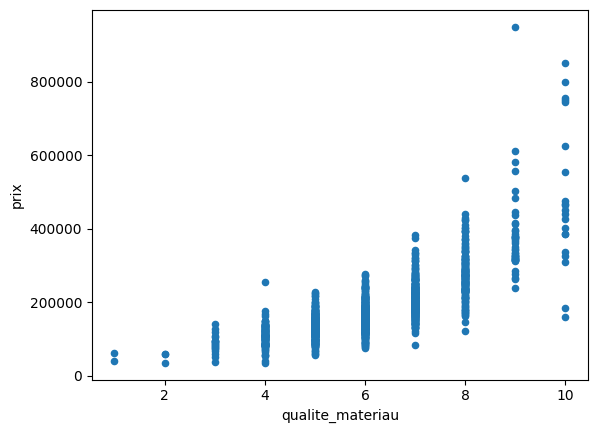

In [3]:
df.plot.scatter("qualite_materiau",'prix')

<Axes: xlabel='surf_hab', ylabel='prix'>

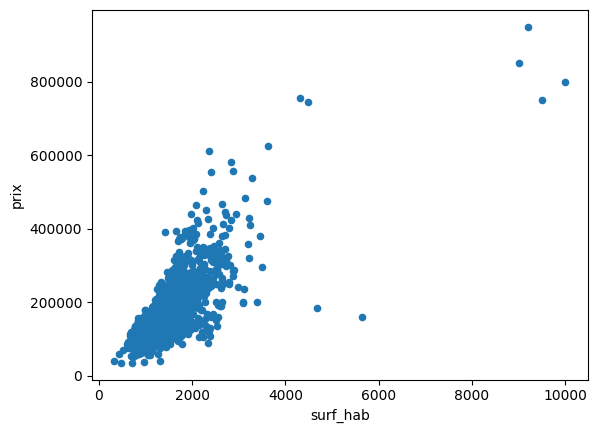

In [4]:
df.plot.scatter("surf_hab",'prix')

<Axes: xlabel='surface_sous_sol', ylabel='prix'>

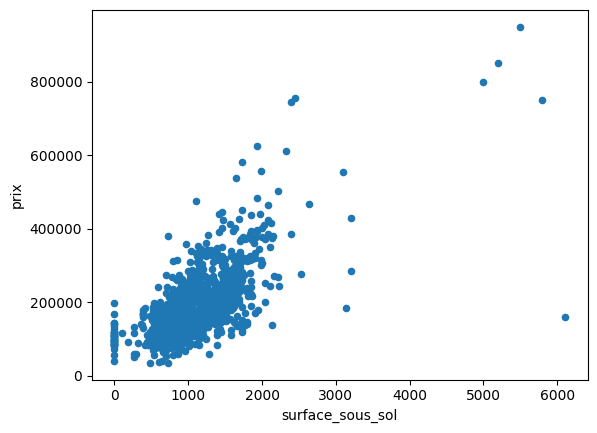

In [5]:
df.plot.scatter("surface_sous_sol","prix")

<Axes: xlabel='qualite_globale', ylabel='prix'>

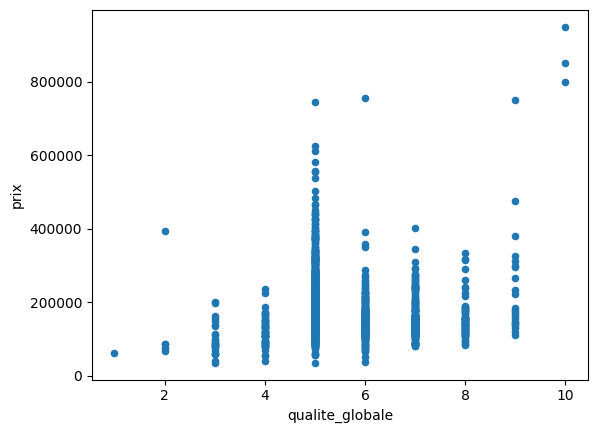

In [6]:
df.plot.scatter("qualite_globale","prix")

<Axes: xlabel='surface_jardin', ylabel='prix'>

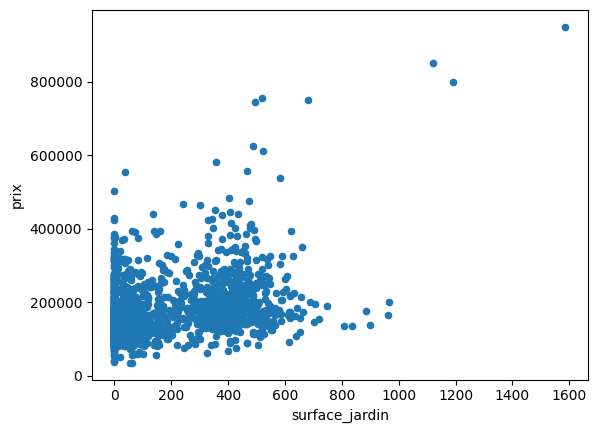

In [7]:
df.plot.scatter("surface_jardin","prix")

<Axes: >

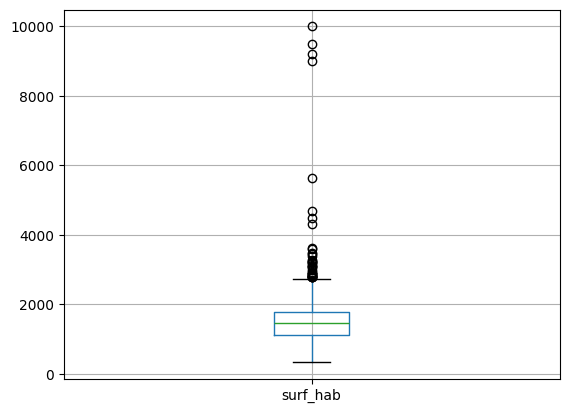

In [8]:




df.boxplot(column="surf_hab")


<Axes: xlabel='n_garage_voitures', ylabel='prix'>

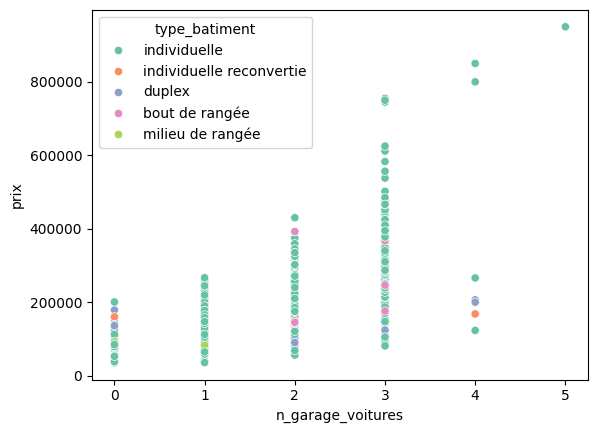

In [9]:
import seaborn as sns

sns.scatterplot(data=df, x="n_garage_voitures", y="prix", hue="type_batiment", palette="Set2")

<Axes: >

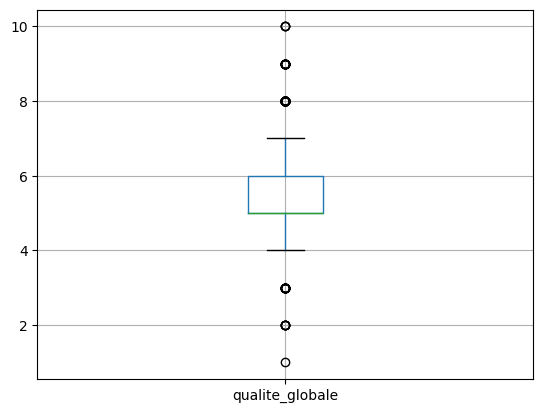

In [10]:
df.boxplot(column="qualite_globale")

<Axes: >

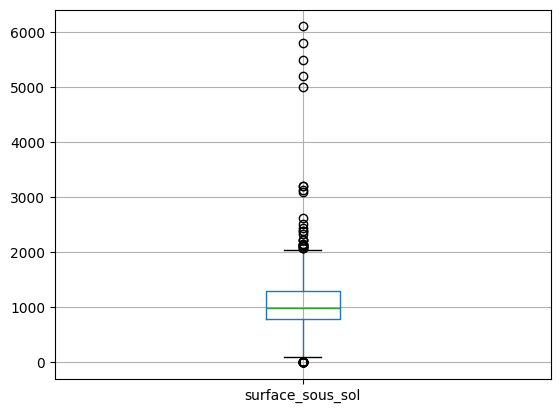

In [11]:
df.boxplot(column="surface_sous_sol")

<Axes: xlabel='n_garage_voitures', ylabel='prix'>

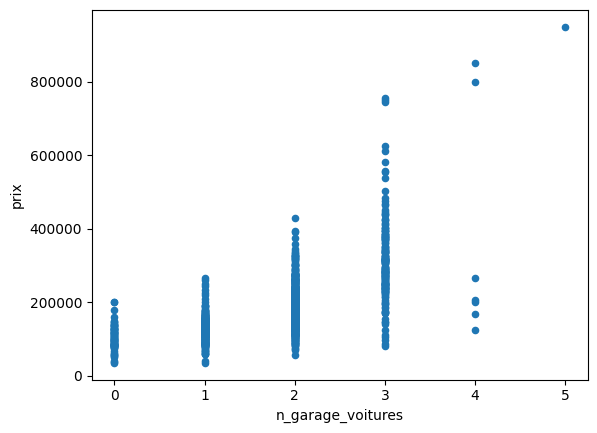

In [12]:
df.plot.scatter("n_garage_voitures","prix")

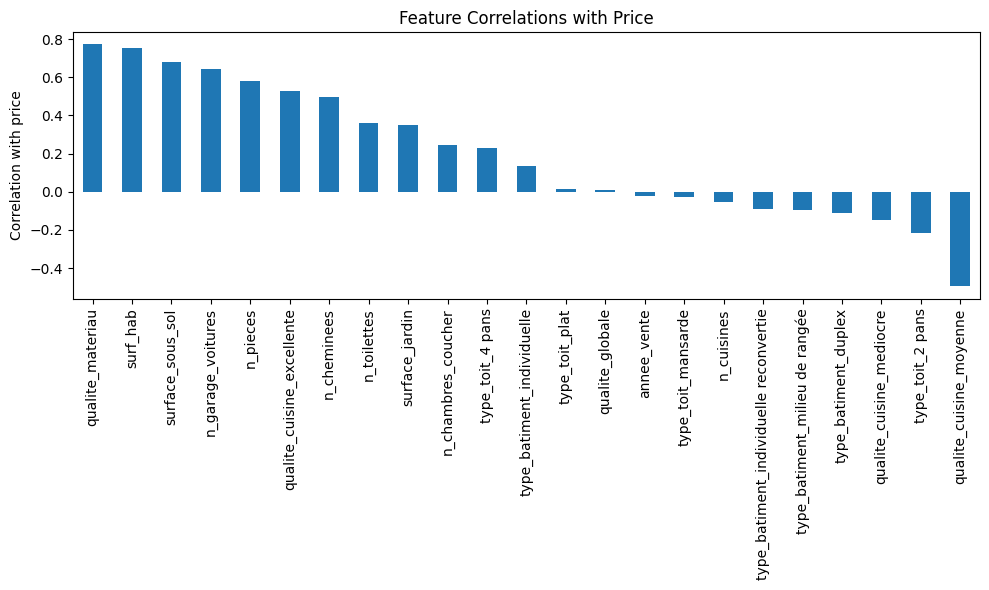

In [13]:
text_columns = ["type_batiment","type_toit","qualite_cuisine"]


df_encoded = pd.get_dummies(df, columns=text_columns, drop_first=True)
corr = df_encoded.corr()["prix"].drop("prix").sort_values(ascending=False)
plt.figure(figsize=(10,6))
corr.plot(kind="bar")
plt.ylabel("Correlation with price")
plt.title("Feature Correlations with Price")
plt.tight_layout()
plt.show()

In [14]:
from sklearn.model_selection import train_test_split




X,Y,X_train, Y_train,X_test, Y_test,X_val,Y_val = data_processing(df,columns_to_drop=[])



print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")
print(f"Validation shape: {X_val.shape}")

Train shape: (708, 12)
Test shape: (237, 12)
Validation shape: (236, 12)


In [15]:
import matplotlib.pyplot as plt



model, poly = model_fit(X_train, Y_train)



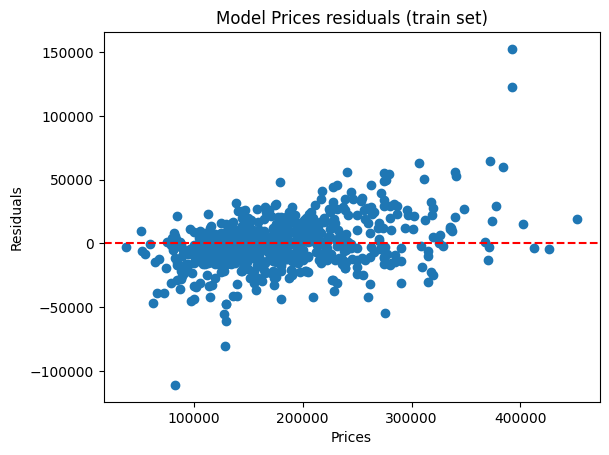

mean of residuals: 13712.890287551345
(708,)


In [16]:




y_pred_train = model_predict(poly,model,X_train)

residuals = Y_train - y_pred_train
#df_train["residuals"] = residuals
plt.scatter(Y_train, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Prices")
plt.ylabel("Residuals")
plt.title("Model Prices residuals (train set)")
plt.show()
print("mean of residuals:", np.mean(np.abs(residuals)))
print(Y_train.shape)

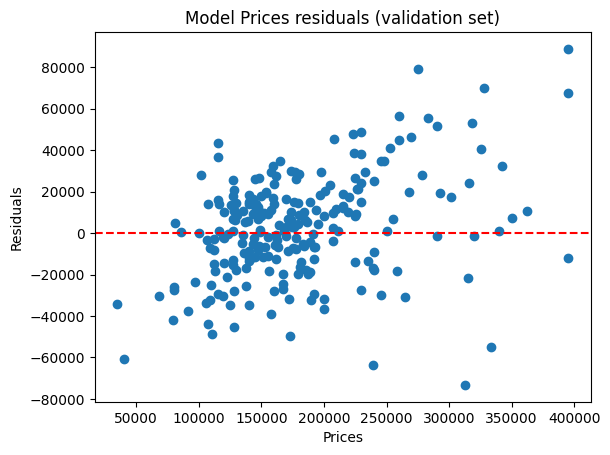

mean of residuals: 19343.62382928079


In [17]:




y_pred = model_predict(poly,model,X_val)
residuals = Y_val - y_pred
#df_train["residuals"] = residuals
plt.scatter(Y_val, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Prices")
plt.ylabel("Residuals")
plt.title("Model Prices residuals (validation set)")
plt.show()
print("mean of residuals:", np.mean(np.abs(residuals)))




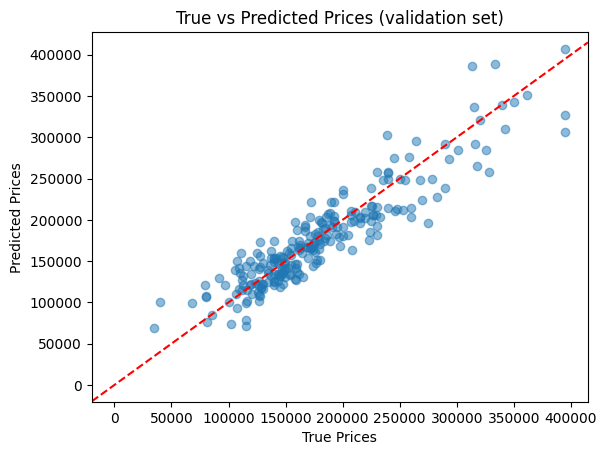

In [18]:

import matplotlib.pyplot as plt

plt.scatter(Y_val, y_pred, alpha=0.5)
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.axline((0, 0), slope=1, color='red', linestyle='--')
plt.title("True vs Predicted Prices (validation set)")
plt.show()

In [19]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_val, y_pred)
print("R² score:", r2)


R² score: 0.8481571004708219


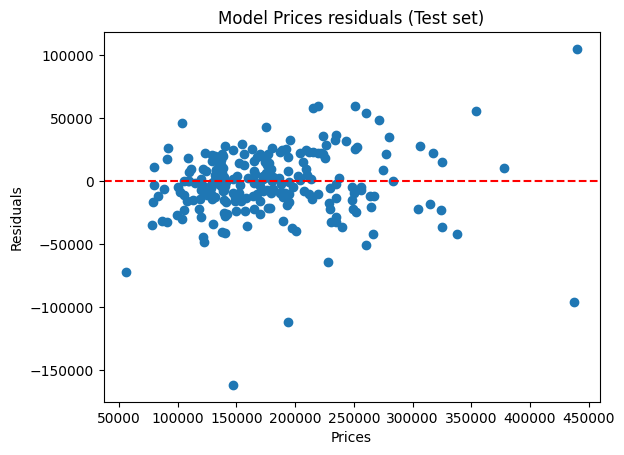

mean of residuals (Test set): 18735.453294982824


In [20]:

y_pred_test = model_predict(poly,model,X_test)
residuals = Y_test - y_pred_test
#df_train["residuals"] = residuals
plt.scatter(Y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Prices")
plt.ylabel("Residuals")
plt.title("Model Prices residuals (Test set)")
plt.show()
print("mean of residuals (Test set):", np.mean(np.abs(residuals)))




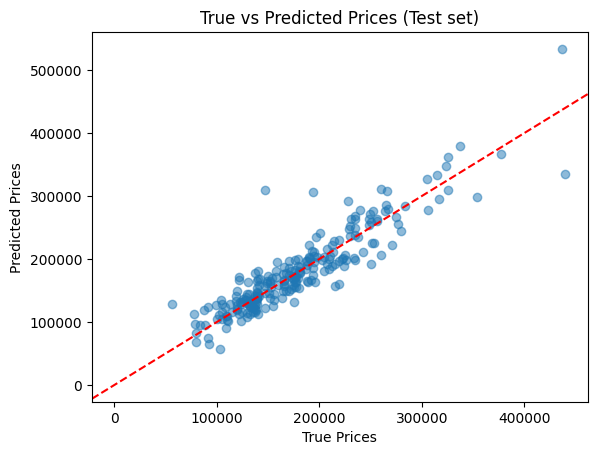

In [21]:
import matplotlib.pyplot as plt

plt.scatter(Y_test, y_pred_test, alpha=0.5)
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.axline((0, 0), slope=1, color='red', linestyle='--')
plt.title("True vs Predicted Prices (Test set)")
plt.show()

In [22]:
r2_score_test = r2_score(Y_test, y_pred_test)
print("R² score test:", r2_score_test)

R² score test: 0.8148605416986879


r2_score 0.8148605416986879
best columns to remove: []
Residuals mean: 18735.453294982824


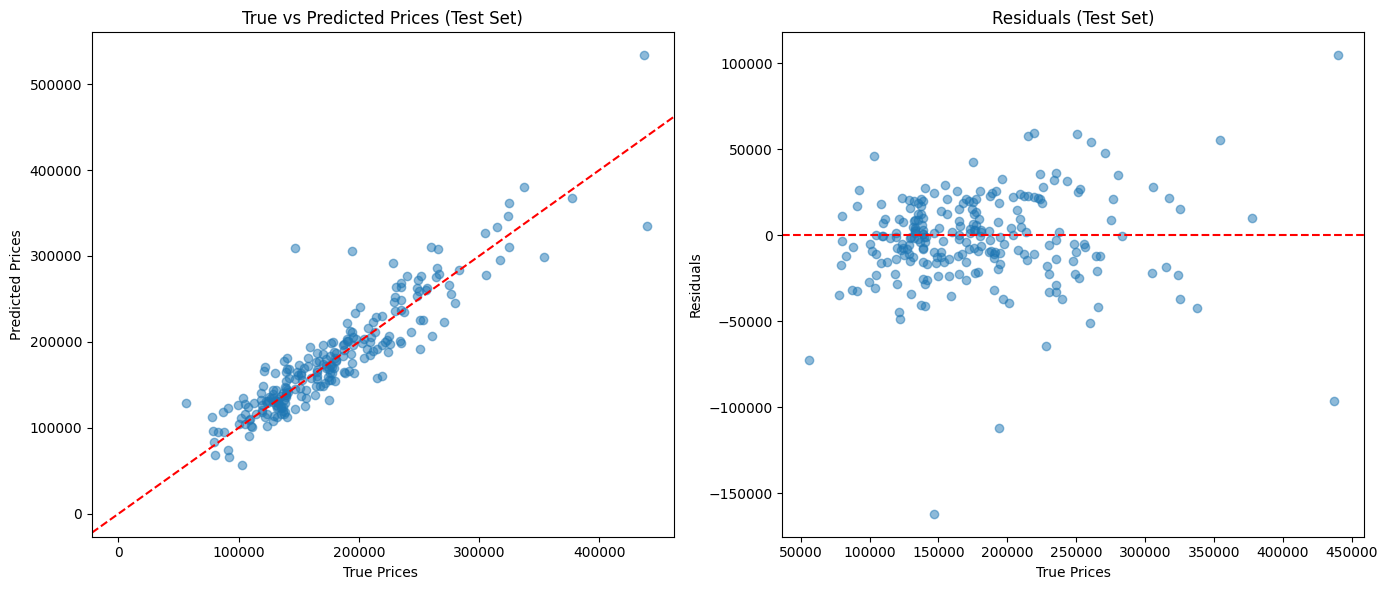

In [23]:
import itertools

def evaluate_all_feature_combinations(df, max_remove=10):
    """
    Pour chaque combinaison de features retirées (jusqu'à max_remove),
    calcule l'erreur moyenne absolue des résiduels sur train et validation.
    """
    errors_train = []
    errors_val = []
    r2_train = []
    r2_val = []
    labels = []

    X, _, X_train, Y_train, _, _, X_val, Y_val = data_processing(df)
    columns = X.columns.tolist()

    min_err_val = np.inf
    best_columns_to_remove = []

    # Cas "toutes les features"
    model, poly = model_fit(X_train, Y_train)
    y_pred_train = model_predict(poly, model, X_train)
    y_pred_val = model_predict(poly, model, X_val)
    err_train = np.mean(np.abs(Y_train - y_pred_train))
    err_val = np.mean(np.abs(Y_val - y_pred_val))
    r2_val_value = r2_score(Y_val, y_pred_val)
    r2_train_value = r2_score(Y_train, y_pred_train)
    if r2_val_value < min_err_val:
        min_err_val = r2_val_value
        best_columns_to_remove = []
    r2_train.append(r2_train_value)
    r2_val.append(r2_val_value)
    errors_train.append(err_train)
    errors_val.append(err_val)
    labels.append("All features")

    # Pour chaque nombre de features à retirer
    for k in range(1, max_remove + 1):
        for feats_to_remove in itertools.combinations(columns, k):
            _, _, X_train, Y_train, _, _, X_val, Y_val = data_processing(df, columns_to_drop=list(feats_to_remove))
            model, poly = model_fit(X_train, Y_train)
            y_pred_train = model_predict(poly, model, X_train)
            y_pred_val = model_predict(poly, model, X_val)
            err_train = np.mean(np.abs(Y_train - y_pred_train))
            err_val = np.mean(np.abs(Y_val - y_pred_val))
            r2_val_value = r2_score(Y_val, y_pred_val)
            r2_train_value = r2_score(Y_train, y_pred_train)
            r2_train.append(r2_train_value)
            r2_val.append(r2_val_value)
            if err_val < min_err_val:
                min_err_val = err_val
                best_columns_to_remove = list(feats_to_remove)
                print(list(feats_to_remove) if "prix" in list(feats_to_remove) else "")
            errors_train.append(err_train)
            errors_val.append(err_val)
            labels.append(f"Without {', '.join(feats_to_remove)}")

    return labels, errors_train, errors_val,r2_train,r2_val, best_columns_to_remove

# Example usage:
def plot_errors_bar(labels, errors_train, errors_val, r2_train, r2_val):
    """
    Bar plot for train and validation errors for each feature combination.
    Shows the error values on top of each bar.
    """
    x = np.arange(len(labels))
    width = 0.35
    plt.figure(figsize=(16, 7))
    bars_train = plt.bar(x - width/2, errors_train, width, label='Train Error')
    bars_val = plt.bar(x + width/2, errors_val, width, label='Validation Error')
    plt.xticks(x, labels, rotation=90)
    plt.ylabel("Mean Absolute Error")
    plt.title("Train and Validation Errors for Feature Combinations")
    plt.legend()
    plt.tight_layout()
    # Annotate each bar with its value
    for bar, val in zip(bars_train, errors_train):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{val:.0f}", 
                 ha='center', va='bottom', fontsize=8, rotation=90)
    for bar, val in zip(bars_val, errors_val):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{val:.0f}", 
                 ha='center', va='bottom', fontsize=8, rotation=90)
    plt.show()

def plot_best_r2_score(columns):
    X,Y,X_train, Y_train,X_test, Y_test,X_val,Y_val = data_processing(df,columns_to_drop=columns)
    model, poly = model_fit(X_train, Y_train)
    y_pred = model_predict(poly,model,X_test)
    print("r2_score", r2_score(Y_test, y_pred))
    print("best columns to remove:", columns)
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # True vs Predicted Prices
    axs[0].scatter(Y_test, y_pred, alpha=0.5)
    axs[0].set_xlabel("True Prices ")
    axs[0].set_ylabel("Predicted Prices")
    axs[0].axline((0, 0), slope=1, color='red', linestyle='--')
    axs[0].set_title("True vs Predicted Prices (Test Set)")

    # Residuals plot
    residuals = Y_test - y_pred
    axs[1].scatter(Y_test, residuals, alpha=0.5)
    axs[1].axhline(0, color='red', linestyle='--')
    axs[1].set_xlabel("True Prices")
    axs[1].set_ylabel("Residuals")
    axs[1].set_title("Residuals (Test Set)")
    print("Residuals mean:", np.mean(np.abs(residuals)))

    plt.tight_layout()
    plt.show()
    

labels, errors_train, errors_val, r2_train, r2_val, best_columns = evaluate_all_feature_combinations(df, max_remove=3)
#plot_errors_bar(labels, errors_train, errors_val, r2_train, r2_val)
plot_best_r2_score(best_columns)
